In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/Users/jotech/Milestone Repo/milestone-project-5/data/clean_stock.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-23,4354.169922,4366.549805,4341.339844,4348.330078,4348.330078,6053620000
2023-06-22,4355.399902,4382.250000,4351.819824,4381.890137,4381.890137,3511000000
2023-06-21,4380.009766,4386.220215,4360.140137,4365.689941,4365.689941,3709330000
2023-06-20,4396.109863,4400.149902,4367.189941,4388.709961,4388.709961,4055790000
2023-06-16,4440.950195,4448.470215,4407.439941,4409.589844,4409.589844,6848600000


In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df['Close'].values.reshape(-1, 1))
df['Scaled Closed'] = df_scaled

In [5]:
X = df_scaled[:-1]
y = df_scaled[1:]

In [6]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, shuffle=False)

In [7]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [8]:
model = Sequential()
model.add(LSTM(120, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dense(60, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

In [9]:
model.fit(X_train, y_train, epochs=80, batch_size=32, verbose=2, validation_split=0.2)

Epoch 1/80
26/26 - 1s - loss: 0.3596 - mse: 0.3596 - val_loss: 0.0219 - val_mse: 0.0219 - 656ms/epoch - 25ms/step
Epoch 2/80
26/26 - 0s - loss: 0.1109 - mse: 0.1109 - val_loss: 0.0258 - val_mse: 0.0258 - 47ms/epoch - 2ms/step
Epoch 3/80
26/26 - 0s - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0557 - val_mse: 0.0557 - 47ms/epoch - 2ms/step
Epoch 4/80
26/26 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0373 - val_mse: 0.0373 - 48ms/epoch - 2ms/step
Epoch 5/80
26/26 - 0s - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0387 - val_mse: 0.0387 - 48ms/epoch - 2ms/step
Epoch 6/80
26/26 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0352 - val_mse: 0.0352 - 49ms/epoch - 2ms/step
Epoch 7/80
26/26 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0335 - val_mse: 0.0335 - 47ms/epoch - 2ms/step
Epoch 8/80
26/26 - 0s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0283 - val_mse: 0.0283 - 47ms/epoch - 2ms/step
Epoch 9/80
26/26 - 0s - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0222 - val_mse: 0.0222 - 46ms/epoch -

In [10]:
y_pred = model.predict(X_test)

y_pred = np.squeeze(y_pred)
y_test = np.squeeze(y_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}\nMAE: {mae:.4f}\nR2: {r2:.4f}')

8/8 [==============================] - 0s 707us/step
MSE: 0.0020
MAE: 0.0334
R2: 0.0033


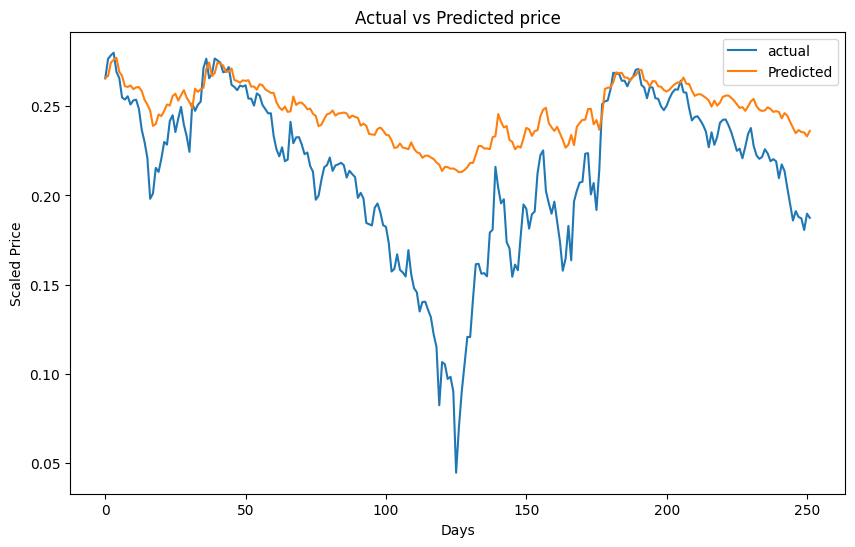

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Days')
plt.ylabel('Scaled Price')
plt.title('Actual vs Predicted price')
plt.legend()
plt.show()